In [21]:
!pip install gradio -q

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
import gradio as gr
import io
import os

In [ ]:
import src.preprocessing as prep
import src.visualization as viz

In [23]:
df=pd.read_csv("mock_ppg_dataset.csv")
df.head()

,id,signal,label
0,seg_000,0.3078833796350262 0.7837013701524913 0.008066...,noisy
1,seg_001,-0.12953850636598865 -0.04093748163874051 0.16...,noisy
2,seg_002,0.020253793177014253 0.3226931541052783 0.1622...,clean
3,seg_003,0.10848454203383687 -0.08692533940266368 0.242...,clean
4,seg_004,0.04629966240274063 0.09525020982536149 0.2047...,clean


In [ ]:
processor=prep.PPGProcessor(fs=100)

In [26]:
X=[]
y=[]
parsedSignals={}
for index,row in df.iterrows():
    segId=row['id']
    rawSig=processor.parseSignal(row['signal'])
    parsedSignals[segId]=rawSig
    filtSig=processor.bandpassFilter(rawSig)
    feats=processor.featureExtractor(filtSig)
    X.append(feats)
    y.append(row['label'])

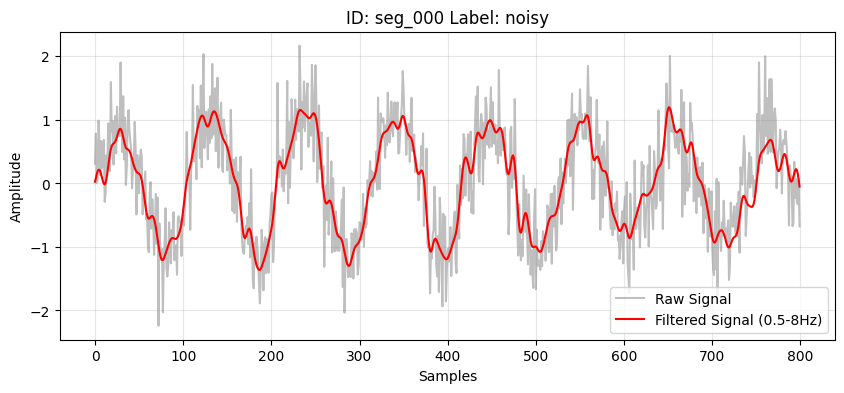

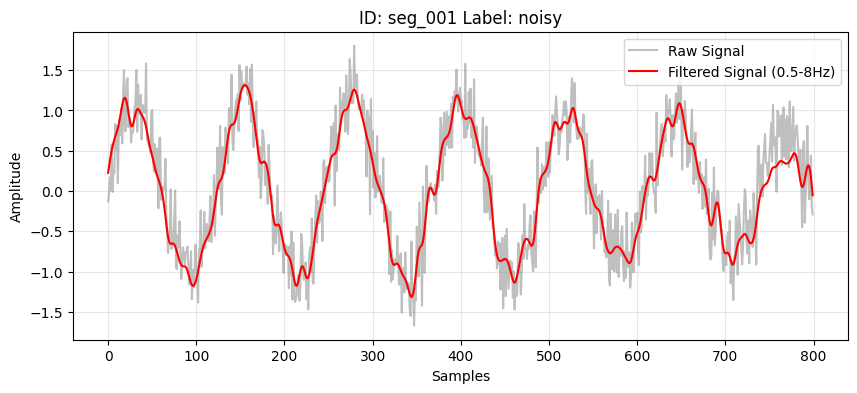

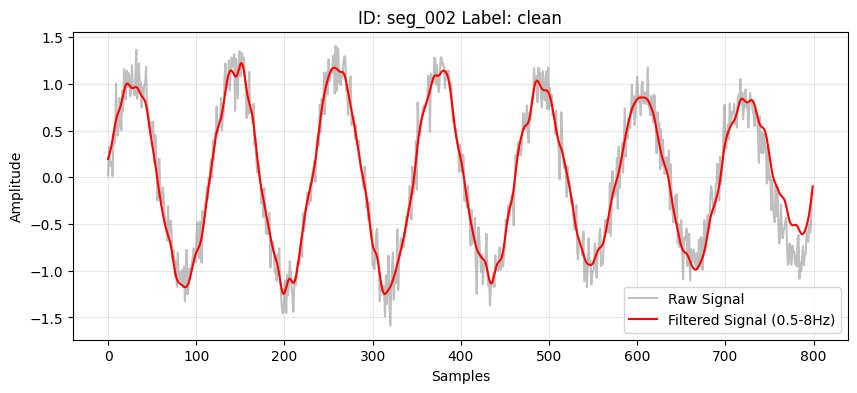

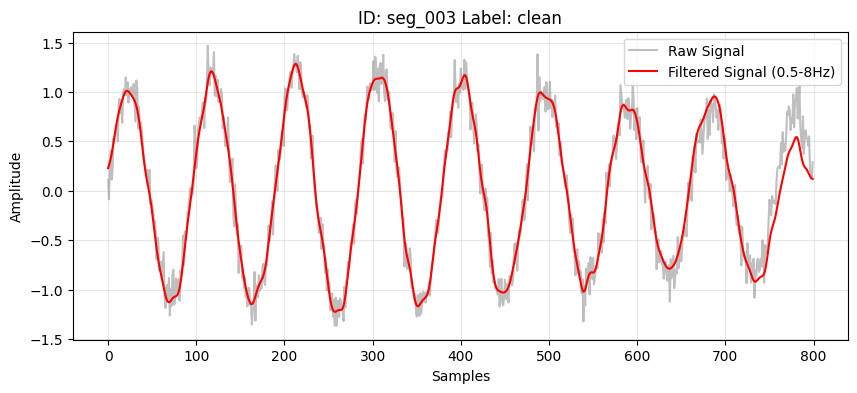

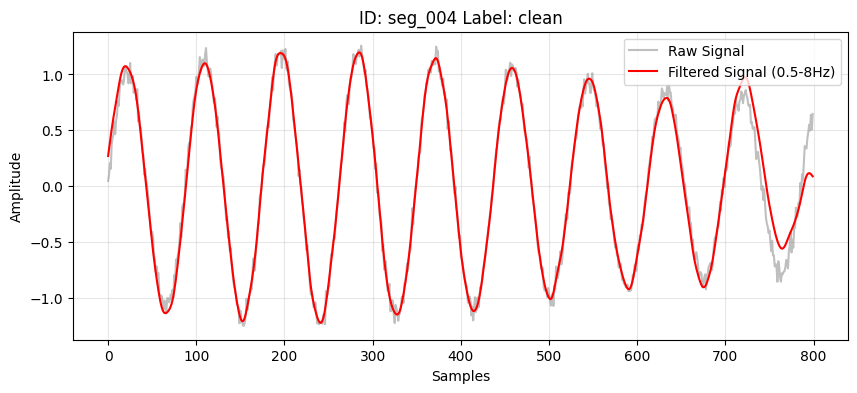

In [ ]:
for segId in df['id'].head():
    viz.visualize(segId)

In [30]:
X=pd.DataFrame(X)
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
clf=RandomForestClassifier(n_estimators=100,random_state=42,max_depth=8)
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [44]:
y_pred=clf.predict(X_val)
acc=accuracy_score(y_val,y_pred)
F1Score=f1_score(y_val, y_pred,average='weighted')

In [33]:
print(f"Accuracy:{acc:%})")

Accuracy:85.000000%)


In [35]:
print(y_val)
print(y_pred)

['noisy', 'noisy', 'noisy', 'noisy', 'clean', 'clean', 'clean', 'noisy', 'clean', 'clean', 'clean', 'noisy', 'clean', 'clean', 'clean', 'noisy', 'noisy', 'clean', 'noisy', 'noisy']
['clean' 'noisy' 'noisy' 'noisy' 'clean' 'clean' 'clean' 'noisy' 'clean'
 'noisy' 'clean' 'noisy' 'clean' 'clean' 'noisy' 'noisy' 'noisy' 'clean'
 'noisy' 'noisy']


In [45]:
print(f"F1 score:{F1Score:%})")

F1 score:84.962406%)


In [50]:
def demo(segId):
    rawSig=parsedSignals[segId]
    actualLabel=df[df['id']==segId]['label'].values[0]
    filtSig=processor.bandpassFilter(rawSig)
    feats=processor.featureExtractor(filtSig)
    featdf=pd.DataFrame([feats])
    predLabel=clf.predict(featdf)[0]

    fig=plt.figure(figsize=(10,4))
    plt.plot(rawSig,label='Raw',color='lightgray')
    plt.plot(filtSig,label='Filtered',color='#007acc')
    plt.title(f"ID:{segId}")
    plt.legend()
    plt.tight_layout()

    buf=io.BytesIO()
    plt.savefig(buf,format='png')
    buf.seek(0)
    img=plt.imread(buf)
    plt.close(fig)
    return img, f"Predicted: {predLabel}\nActual: {actualLabel}"

In [ ]:
ids_list=df['id'].tolist()
interface=gr.Interface(
    fn=demo,
    inputs=gr.Dropdown(choices=ids_list,label="Select Segment ID"),
    outputs=[gr.Image(label="Signal Analysis"),gr.Textbox(label="Result", lines=3)],
    title="PPG Signal Quality Classifier",
    description="Select a signal ID to check if it is Clean or Noisy."
)
interface.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://e7b9adab86693b6dfd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
